In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import scipy.stats as ss
from scipy.optimize import curve_fit
from ntuple_lib import *
beautify_plots(plt)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
files = ['ntuples_condor/OutDir_{}/hist-Rel21sample.root'.format(i) for i in range(1, 10)]
track_num_px = np.array([], dtype='object')
track_num_SCT = np.array([], dtype='object')
track_theta = np.array([], dtype='object')
track_qOverP = np.array([], dtype='object')

for file in files:
    root_file = uproot.open(file)
    for key in root_file.keys():
        if key.startswith('EventTree'):
            tree = root_file[key]
            track_num_px = np.concatenate((track_num_px, tree['tracks_numPix'].array(library='np')))
            track_num_SCT = np.concatenate((track_num_SCT, tree['tracks_numSCT'].array(library='np')))
            track_theta = np.concatenate((track_theta, tree['track_theta'].array(library='np')))
            track_qOverP = np.concatenate((track_qOverP, tree['track_qOverP'].array(library='np')))

track_all_si_hits = track_num_px+track_num_SCT
track_eta = np.array([-np.log(np.tan(theta/2)) for theta in track_theta], dtype='object')
track_sin_theta = np.array([np.sin(theta) for theta in track_theta], dtype='object')
track_pT = np.abs(track_sin_theta/track_qOverP)

track_pT_flat = flatten_array(track_pT)
track_eta_flat = flatten_array(track_eta)
track_num_px_flat = flatten_array(track_num_px)

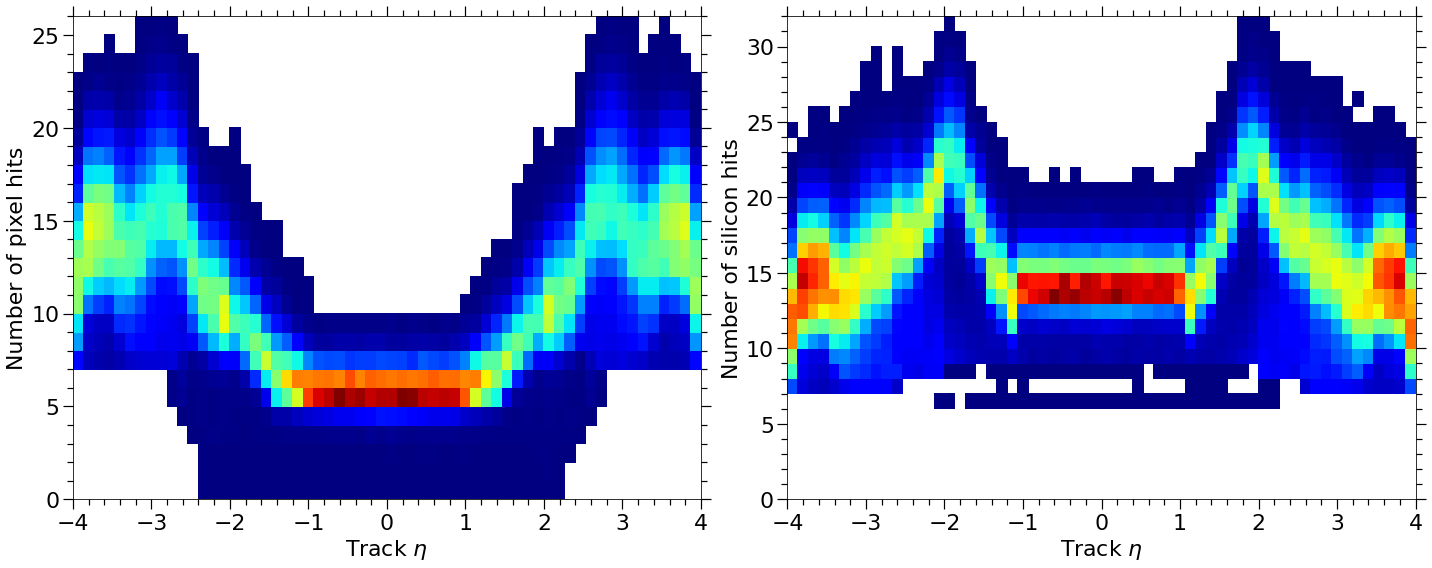

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 8)

hist = ax1.hist2d(track_eta_flat, track_num_px_flat, bins=(60, 29), cmin=50, cmap='jet')
# fig.colorbar(cm.ScalarMappable(norm = Normalize(np.nanmin(hist[0]), np.nanmax(hist[0])), cmap='jet'), ax=ax1, label='Number of tracks')

ax1.set_xlabel('Track $\\eta$')
ax1.set_ylabel('Number of pixel hits')

ax1.set_xlim(-4, 4)
ax1.set_ylim(0, 26)
ax1.tick_params(which='major', axis='both', length=10, width=1.2)
ax1.tick_params(which='minor', axis='both', length=6, width=1.2)
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(MultipleLocator(0.2))
ax1.xaxis.set_major_locator(MultipleLocator(1))


hist = ax2.hist2d(track_eta_flat, flatten_array(track_all_si_hits), bins=(60, 27), cmin=18, cmap='jet')
# fig.colorbar(cm.ScalarMappable(norm = Normalize(np.nanmin(hist[0]), np.nanmax(hist[0])), cmap='jet'), ax=ax2, label='Number of tracks')
ax2.set_xlabel('Track $\\eta$')
ax2.set_ylabel('Number of silicon hits')

ax2.set_xlim(-4, 4)
ax2.set_ylim(0, 32)
ax2.tick_params(which='major', axis='both', length=10, width=1.2)
ax2.tick_params(which='minor', axis='both', length=6, width=1.2)
ax2.yaxis.set_minor_locator(MultipleLocator(1))
ax2.xaxis.set_minor_locator(MultipleLocator(0.2))
ax2.xaxis.set_major_locator(MultipleLocator(1))

fig.tight_layout()

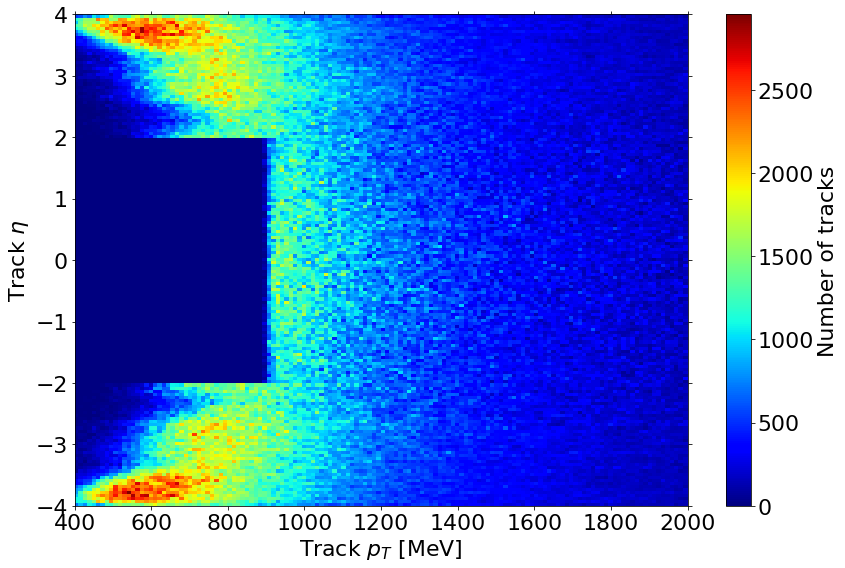

In [8]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 8)

pT_range = 2e3

idxs = np.abs(track_pT_flat) < pT_range

hist = ax.hist2d(np.abs(track_pT_flat[idxs]), track_eta_flat[idxs], bins=(140, 160), cmap='jet')
fig.colorbar(cm.ScalarMappable(norm = Normalize(np.nanmin(hist[0]), np.nanmax(hist[0])), cmap='jet'), ax=ax, label='Number of tracks')
ax.set_ylabel('Track $\\eta$')
ax.set_xlabel('Track $p_T$ [MeV]')

ax.set_ylim(-4, 4)
ax.set_xlim(400, pT_range)
plt.tight_layout()

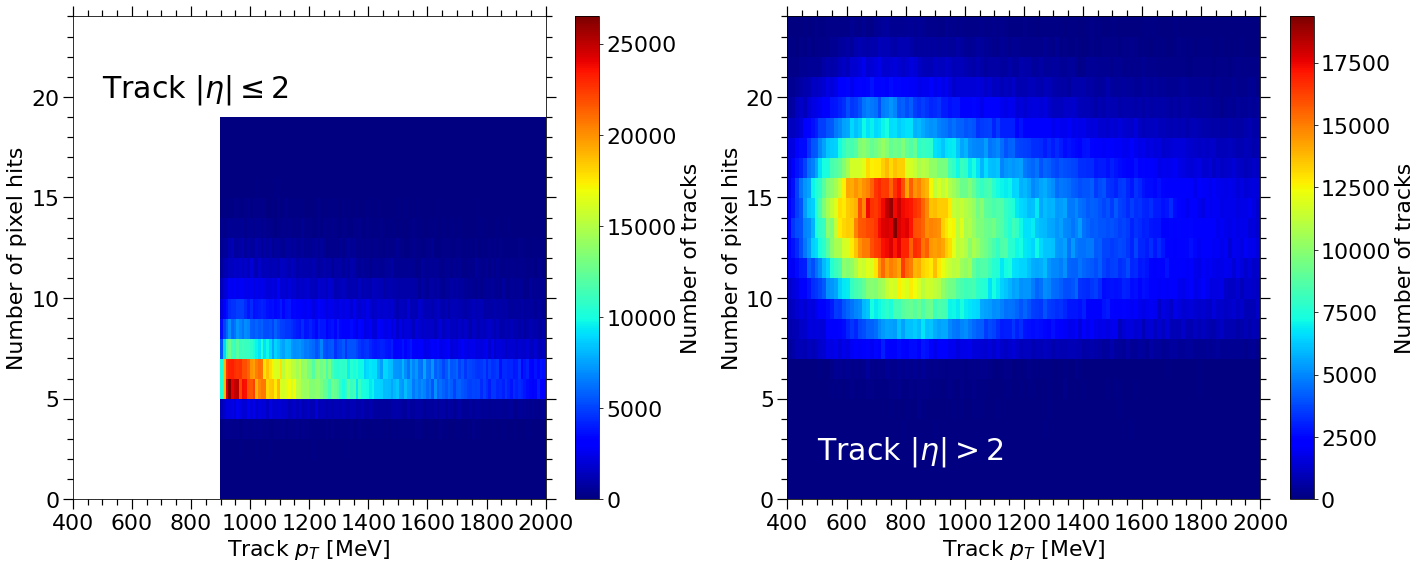

In [29]:
pT_lims1 = (400, 2000)
pT_lims2 = (400, 2000)
eta_cutoff = 2

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 8)


idxs1 = np.logical_and(np.abs(track_pT_flat) < pT_lims1[1], np.abs(track_eta_flat) <= eta_cutoff)
hist = ax1.hist2d(np.abs(track_pT_flat[idxs1]), track_num_px_flat[idxs1], bins=(120, 19), cmap='jet')
fig.colorbar(cm.ScalarMappable(norm = Normalize(np.nanmin(hist[0]), np.nanmax(hist[0])), cmap='jet'), ax=ax1, label='Number of tracks')

ax1.text(500, 20, "Track $|\\eta| \\leq {}$".format(eta_cutoff), fontsize=30)

ax1.tick_params(which='major', axis='both', length=10, width=1.2)
ax1.tick_params(which='minor', axis='both', length=6, width=1.2)
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(MultipleLocator(50))
ax1.xaxis.set_major_locator(MultipleLocator(200))

ax1.set_xlabel('Track $p_T$ [MeV]')
ax1.set_ylabel('Number of pixel hits')

ax1.set_xlim(*pT_lims1)
ax1.set_ylim(0, 24)



idxs2 = np.logical_and(np.abs(track_pT_flat) < pT_lims2[1], np.abs(track_eta_flat) > eta_cutoff)
hist = ax2.hist2d(np.abs(track_pT_flat[idxs2]), track_num_px_flat[idxs2], bins=(120, 29), cmap='jet')
fig.colorbar(cm.ScalarMappable(norm = Normalize(np.nanmin(hist[0]), np.nanmax(hist[0])), cmap='jet'), ax=ax2, label='Number of tracks')

ax2.text(500, 2, "Track $|\\eta| > {}$".format(eta_cutoff), fontsize=30, color='white')

ax2.tick_params(which='major', axis='both', length=10, width=1.2)
ax2.tick_params(which='minor', axis='both', length=6, width=1.2)
ax2.yaxis.set_minor_locator(MultipleLocator(1))
ax2.xaxis.set_minor_locator(MultipleLocator(50))
ax2.xaxis.set_major_locator(MultipleLocator(200))

ax2.set_xlabel('Track $p_T$ [MeV]')
ax2.set_ylabel('Number of pixel hits')

ax2.set_xlim(*pT_lims2)
ax2.set_ylim(0, 24)

fig.tight_layout()